# Funnel Analysis

## Goal


The goal is to perform funnel analysis for an e-commerce website.

Typically, websites have a clear path to conversion: for instance, you land on the home page, then you search, select a product and buy it. At each of these steps, some users will drop off and leave the site. The sequence of pages that leads to conversion is called ‘funnel’ .

Data Science can have a tremendous impact on funnel optimization.
Funnel analysis allows to understand where/when our users abandon the website. It gives crucial insights on user behavior and on ways to improve the user experience as well as it often allows to discover bugs.


## Challenge Description


You are looking at data from an e-commerce website. The site is very simple and has just 4 pages:


- The first page is the home page. When you come to the site for the first time, you can only land on the home page as a first page.

- From the home page, the user can perform a search and land on the search page.

- From the search page, if the user clicks on a product, she will get to the payment page, where she is asked to provide payment information in order to buy that product.

- If she does decide to buy, she ends up on the confirmation page


he company CEO isn’t very happy with the company sales and, especially, sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you can create hypotheses on how conversion rate could be improved.

Specifically, she is interested in :



- A full picture of funnel conversion rate for both desktop and mobile


- Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate.



In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

05_Funnel_Analysis.ipynb        payment_page_table.csv
home_page_table.csv             search_page_table.csv
payment_confirmation_table.csv  user_table.csv


In [3]:
df_user = pd.read_csv('user_table.csv')
df_user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [4]:
df_homepage = pd.read_csv('home_page_table.csv')
df_homepage.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [5]:
df_searchpage = pd.read_csv('search_page_table.csv')
df_searchpage.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [6]:
df_paypage = pd.read_csv('payment_page_table.csv')
df_paypage.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [7]:
df_paid = pd.read_csv('payment_confirmation_table.csv')
df_paid.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [12]:
print(df_user.shape)
print(df_homepage.shape)
print(df_searchpage.shape)
print(df_paypage.shape)
print(df_paid.shape)

(90400, 4)
(90400, 2)
(45200, 2)
(6030, 2)
(452, 2)


In [30]:
df_merger1 = pd.merge(df_user, df_homepage, how = 'left',on = 'user_id')
df_merger2 = pd.merge(df_merger1, df_searchpage, how = 'left',on = 'user_id')
df_merger3 = pd.merge(df_merger2, df_paypage, how = 'left',on = 'user_id')
df_merger  = pd.merge(df_merger3, df_paid, how = 'left', on = 'user_id')
df_merger.columns = ['user_id', 'data','device','sex','home','search','pay','confirmed']
df_merger.head()

,user_id,data,device,sex,home,search,pay,confirmed
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [58]:
df_merger.groupby('device').size().reset_index(name='users')

,device,users
0,Desktop,60200
1,Mobile,30200


In [63]:
df1 = df_merger[~df_merger.home.isnull()].groupby('device').size().reset_index(name='home')
df1

,device,home
0,Desktop,60200
1,Mobile,30200


In [74]:
df2 = df_merger[~df_merger.search.isnull()].groupby('device').size().reset_index(name='search')
df1 = pd.merge(df1,df2,how = 'left',on ='device')
df1

,device,home,search
0,Desktop,60200,30100
1,Mobile,30200,15100


In [75]:
df3 = df_merger[~df_merger.pay.isnull()].groupby('device').size().reset_index(name='pay')
df1 = pd.merge(df1,df3,how = 'left',on ='device')
df1

,device,home,search,pay
0,Desktop,60200,30100,3010
1,Mobile,30200,15100,3020


In [76]:
df4 = df_merger[~df_merger.confirmed.isnull()].groupby('device').size().reset_index(name='confirmed')
df1 = pd.merge(df1,df4,how = 'left',on ='device')
df1

,device,home,search,pay,confirmed
0,Desktop,60200,30100,3010,150
1,Mobile,30200,15100,3020,302


In [111]:
df1['hometosearch'] = df1.search/df1.home
df1['searchtopay'] = df1.pay/df1.search
df1['paytoconfirm'] = df1.confirmed/df1.pay
df1['conversion'] = df1.confirmed/df1.home
df1.drop(index, axis=1)

NameError: name 'index' is not defined

Desktop has much lower conversion rate than Mobile.

In [83]:
df_sex = df_merger[~df_merger.home.isnull()].groupby('sex').size().reset_index(name='home')

df2 = df_merger[~df_merger.search.isnull()].groupby('sex').size().reset_index(name='search')
df_sex = pd.merge(df_sex,df2,how = 'left',on ='sex')

df3 = df_merger[~df_merger.pay.isnull()].groupby('sex').size().reset_index(name='pay')
df_sex = pd.merge(df_sex,df3,how = 'left',on ='sex')


df4 = df_merger[~df_merger.confirmed.isnull()].groupby('sex').size().reset_index(name='confirmed')
df_sex = pd.merge(df_sex,df4,how = 'left',on ='sex')

df_sex

,sex,home,search,pay,confirmed
0,Female,45075,22676,3100,241
1,Male,45325,22524,2930,211


In [84]:
df_sex['hometosearch'] = df_sex.search/df_sex.home
df_sex['searchtopay'] = df_sex.pay/df_sex.search
df_sex['paytoconfirm'] = df_sex.confirmed/df_sex.pay
df_sex['conversion'] = df_sex.confirmed/df_sex.home
df_sex

,sex,home,search,pay,confirmed,hometosearch,searchtopay,paytoconfirm,conversion
0,Female,45075,22676,3100,241,0.503073,0.136708,0.077742,0.005347
1,Male,45325,22524,2930,211,0.496944,0.130083,0.072014,0.004655


Not too much difference between Female and Male. 

## Do some visualization 

for fun. 

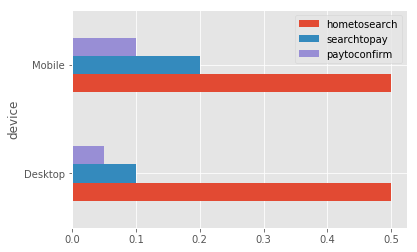

In [116]:
df1[['device','hometosearch','searchtopay','paytoconfirm']].set_index('device').plot(kind='barh')

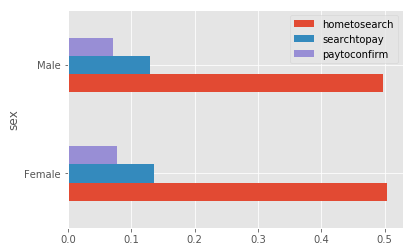

In [117]:
df_sex[['sex','hometosearch','searchtopay','paytoconfirm']].set_index('sex').plot(kind='barh')

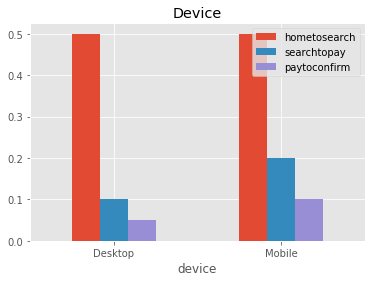

In [118]:
df1[['device','hometosearch','searchtopay','paytoconfirm']].set_index('device').plot.bar(title ="Device", rot=0)